In [1]:
!pip install pandas_datareader
!pip install arch
!pip install statsmodels


In [ ]:
!pip install yfinance

In [18]:

from  pandas_datareader import data 
import yfinance as yf

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [21]:
start = datetime(2015, 1, 1)
end = datetime(2021, 9, 9)

In [25]:
tickerData = yf.Ticker("BTC-USD")
tickerDf = tickerData.history(interval='1d', start=start, end=end)


In [28]:
returns = 100 * tickerDf.Close.pct_change().dropna()


In [29]:
returns.head()

Date
2015-01-02     0.249172
2015-01-03   -10.776686
2015-01-04    -6.007853
2015-01-05     3.890684
2015-01-06     4.268163
Name: Close, dtype: float64

Text(0.5, 1.0, 'BTC-USD Returns')

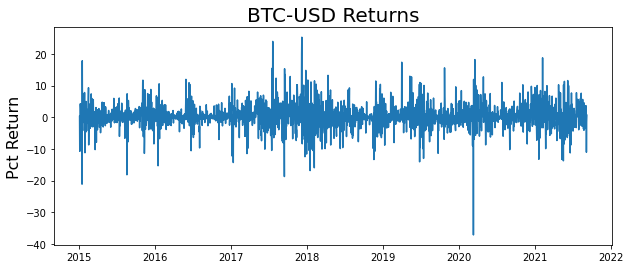

In [30]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BTC-USD Returns', fontsize=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


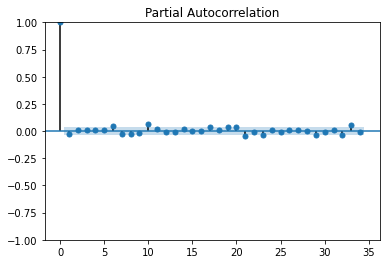

In [32]:
plot_pacf(returns)
plt.show()

In [33]:
model = arch_model(returns, p=3, q=3)


In [34]:
model_fit = model.fit()


Iteration:      1,   Func. Count:     10,   Neg. LLF: 6580.774767785337
Iteration:      2,   Func. Count:     22,   Neg. LLF: 6576.201447755349
Iteration:      3,   Func. Count:     34,   Neg. LLF: 6573.664574331171
Iteration:      4,   Func. Count:     47,   Neg. LLF: 6572.32305205283
Iteration:      5,   Func. Count:     58,   Neg. LLF: 6567.855983237884
Iteration:      6,   Func. Count:     69,   Neg. LLF: 6565.711520885433
Iteration:      7,   Func. Count:     80,   Neg. LLF: 6563.43937740551
Iteration:      8,   Func. Count:     91,   Neg. LLF: 6562.508342215237
Iteration:      9,   Func. Count:    102,   Neg. LLF: 6562.05469168886
Iteration:     10,   Func. Count:    113,   Neg. LLF: 6561.85254691905
Iteration:     11,   Func. Count:    124,   Neg. LLF: 6561.589713126332
Iteration:     12,   Func. Count:    135,   Neg. LLF: 6561.486813148328
Iteration:     13,   Func. Count:    146,   Neg. LLF: 6561.341157412736
Iteration:     14,   Func. Count:    157,   Neg. LLF: 6561.291529394

In [35]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6561.08
Distribution:                  Normal   AIC:                           13138.2
Method:            Maximum Likelihood   BIC:                           13184.6
                                        No. Observations:                 2439
Date:                Fri, Oct 08 2021   Df Residuals:                     2438
Time:                        13:11:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2518  6.218e-02      4.049  5.138e-05 [  0.130,  0.374]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0425      0.543      1.920  5.482e-02 [-2.155e-02,  2.107]
alpha[1]       0.1925  6.190e-02      3.109  1.877e-03  [7.113e-02,  0.314]
alpha[2]   9.1979e-03  7.553e-02      0.122      0.903    [ -0.139,  0.157]
alpha[3]       0.0196  6.439e-02      0.304      0.761    [ -0.107,  0.146]
beta[1]        0.2765      0.289      0.955      0.339    [ -0.291,  0.844]
beta[2]    9.8892e-12      0.277  3.564e-11      1.000    [ -0.544,  0.544]
beta[3]        0.4521      0.127      3.570  3.568e-04    [  0.204,  0.700]
===========================================================================

Covariance estimator: robust
"""

In [36]:
model = arch_model(returns, p=3, q=0)


In [37]:
model_fit = model.fit()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 6774.948862567135
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6711.011768826783
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6699.065484532553
Iteration:      4,   Func. Count:     35,   Neg. LLF: 6694.609203366321
Iteration:      5,   Func. Count:     43,   Neg. LLF: 6692.9388738129
Iteration:      6,   Func. Count:     51,   Neg. LLF: 6691.777825787445
Iteration:      7,   Func. Count:     59,   Neg. LLF: 6691.451568070149
Iteration:      8,   Func. Count:     67,   Neg. LLF: 6689.988885806429
Iteration:      9,   Func. Count:     74,   Neg. LLF: 6689.727420506893
Iteration:     10,   Func. Count:     81,   Neg. LLF: 6689.714921615494
Iteration:     11,   Func. Count:     88,   Neg. LLF: 6689.713964335076
Iteration:     12,   Func. Count:     95,   Neg. LLF: 6689.713903018642
Iteration:     13,   Func. Count:    102,   Neg. LLF: 6689.713899295053
Optimization terminated successfully.    (Exit mode 0)
           

In [38]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6689.71
Distribution:                  Normal   AIC:                           13389.4
Method:            Maximum Likelihood   BIC:                           13418.4
                                        No. Observations:                 2439
Date:                Fri, Oct 08 2021   Df Residuals:                     2438
Time:                        13:12:47   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3155  6.722e-02      4.693  2.698e-06 [  0.184,  0.447]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          9.5921      1.395      6.875  6.196e-12   [  6.858, 12.327]
alpha[1]       0.1505  4.107e-02      3.666  2.468e-04 [7.005e-02,  0.231]
alpha[2]       0.1174  5.520e-02      2.127  3.346e-02 [9.197e-03,  0.226]
alpha[3]       0.1470  5.104e-02      2.880  3.972e-03 [4.698e-02,  0.247]
==========================================================================

Covariance estimator: robust
"""

In [48]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=10, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [49]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])


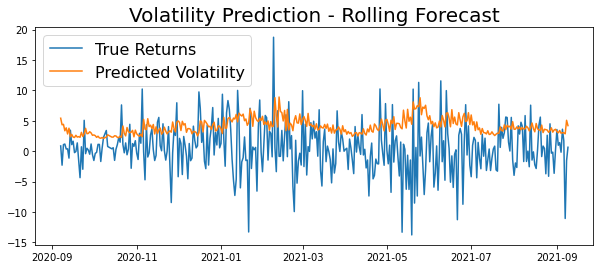

In [50]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)